[E-03]Cat_whiskers


필요한 모듈을 import 합니다.



In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

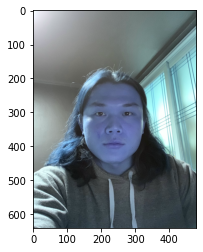

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

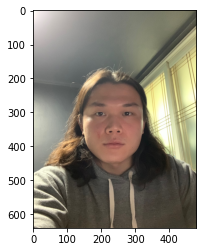

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()

# detector_hog를 이용하여 얼굴의 bounding box를 추출합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(139, 263) (324, 449)]]


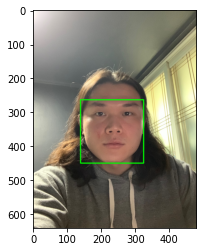

In [5]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
# 저장한 landmark 모델을 불러옵니다
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


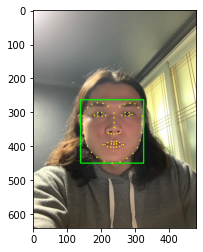

In [7]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [8]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 코의 index는 30 입니다
    x = landmark[33][0] - 5
    y = landmark[33][1] + dlib_rect.height()//2 - 8
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(237, 364)
(x,y) : (232,449)
(w,h) : (186,186)


255 - img_sticker을 통해서 색 반전

In [9]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
img_sticker = 255 - img_sticker
print (img_sticker.shape)

(186, 186, 3)


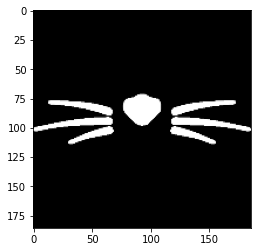

In [10]:
plt.imshow(img_sticker)
plt.show()


In [11]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (139,263)


In [12]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (139,263)


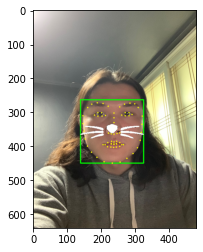

In [13]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

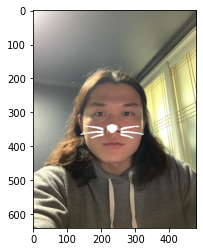

In [14]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

다른 각도

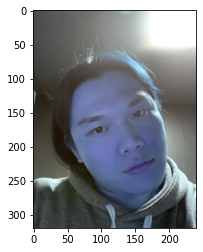

In [15]:
my_image_path1 = os.getenv('HOME')+'/aiffel/camera_sticker/images/image1.png'
img_bgr1 = cv2.imread(my_image_path1)    # OpenCV로 이미지를 불러옵니다
img_show1 = img_bgr1.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr1)
plt.show()

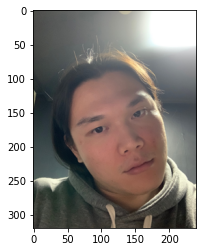

In [16]:
img_rgb1 = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb1)
plt.show()

In [17]:
img_rgb1 = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb1, 1)   # (image, num of image pyramid)

rectangles[[(64, 116) (218, 270)]]


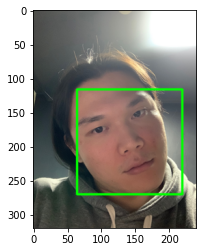

In [18]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show1, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb1 =  cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb1)
plt.show()

In [19]:
# 저장한 landmark 모델을 불러옵니다
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks1 = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks1.append(list_points)

print(len(list_landmarks1[0]))

68


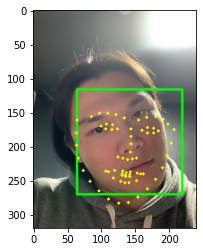

In [20]:
for landmark in list_landmarks1:
    for point in landmark:
        cv2.circle(img_show1, point, 2, (0, 255, 255), -1)

img_show_rgb1 = cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb1)
plt.show()

In [21]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks1):
    print (landmark[33]) # 코의 index는 30 입니다
    x = landmark[33][0] - 5
    y = landmark[33][1] + dlib_rect.height()//2 - 8
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(138, 219)
(x,y) : (133,288)
(w,h) : (155,155)


In [22]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
img_sticker = 255 - img_sticker
print (img_sticker.shape)

(155, 155, 3)


In [23]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (56,133)


In [24]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (56,133)


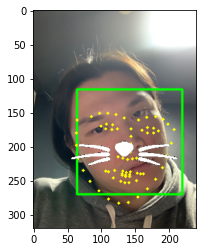

In [25]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area1 = img_show1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area1,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB))
plt.show()

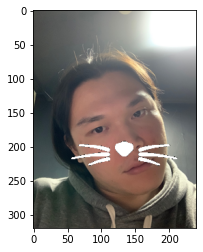

In [26]:
sticker_area1 = img_bgr1[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr1[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area1,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2RGB))
plt.show()

사진의 각도가 바뀌어도 rectangle의 각도는 변하지 않고 그대로 임을 알 수 있다.

그렇기에 랜드마크의 위치도 변하지 않고 같은 자리에 찍히고 그로 인해서 스티커의 각도가 얼굴에 따라서 움직이지 않았다.

사진의 각도에 따라서 rectangle의 각도가 변한다면 스티커도 제대로 찍힐 것 같다.